In [1]:
%matplotlib inline

from __future__ import division

import os
import sys
import tensorflow as tf
import skimage.io as io
import numpy as np

sys.path.append("tf_image_segmentation/")
sys.path.append("models/research/slim/")

fcn_8s_checkpoint_path = 'tf_image_segmentation/fcn_8s_checkpoint/model_fcn8s_final.ckpt'

os.environ["CUDA_VISIBLE_DEVICES"] = '0'

slim = tf.contrib.slim

from tf_image_segmentation.models.fcn_8s import FCN_8s
from tf_image_segmentation.utils.inference import adapt_network_for_any_size_input
from tf_image_segmentation.utils.pascal_voc import pascal_segmentation_lut

In [2]:
number_of_classes = 21

image_filename = 'tf_image_segmentation/images/me1.jpg'

#image_filename = 'small_cat.jpg'

image_filename_placeholder = tf.placeholder(tf.string)

feed_dict_to_use = {image_filename_placeholder: image_filename}

image_tensor = tf.read_file(image_filename_placeholder)

image_tensor = tf.image.decode_jpeg(image_tensor, channels=3)

# Fake batch for image and annotation by adding
# leading empty axis.
image_batch_tensor = tf.expand_dims(image_tensor, axis=0)

In [3]:
# Be careful: after adaptation, network returns final labels
# and not logits
FCN_8s = adapt_network_for_any_size_input(FCN_8s, 32)


pred, fcn_16s_variables_mapping = FCN_8s(image_batch_tensor=image_batch_tensor,
                                          number_of_classes=number_of_classes,
                                          is_training=False)

# The op for initializing the variables.
initializer = tf.local_variables_initializer()

saver = tf.train.Saver()

INFO:tensorflow:Restoring parameters from tf_image_segmentation/fcn_8s_checkpoint/model_fcn8s_final.ckpt


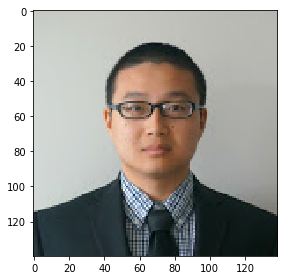

/home/charlioxumykj/miniconda3/envs/dlnd/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


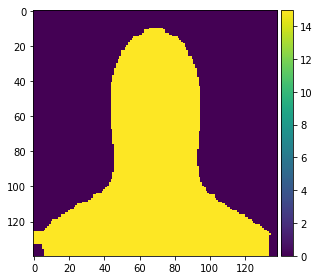

In [6]:
with tf.Session() as sess:
    
    sess.run(initializer)

    saver.restore(sess, "tf_image_segmentation/fcn_8s_checkpoint/model_fcn8s_final.ckpt")
    
    image_np, pred_np = sess.run([image_tensor, pred], feed_dict=feed_dict_to_use)
        
    io.imshow(image_np)
    io.show()
    
    io.imshow(pred_np.squeeze())
    io.show()